# K Nearest Neighbors (KNN)

### (a) Download the Vertebral Column Data Set from: 
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

### (b) Pre-Processing and Exploratory data analysis:

- i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
- ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.
- iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arff

In [2]:
with open('../data/vertebral_column_data/column_2C_weka.arff') as f:
    data = arff.load(f)

columns = [attribute[0] for attribute in data['attributes']]
df = pd.DataFrame(data['data'], columns= columns)

df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

Text(0.5, 0.98, 'Plots of each independent variables')

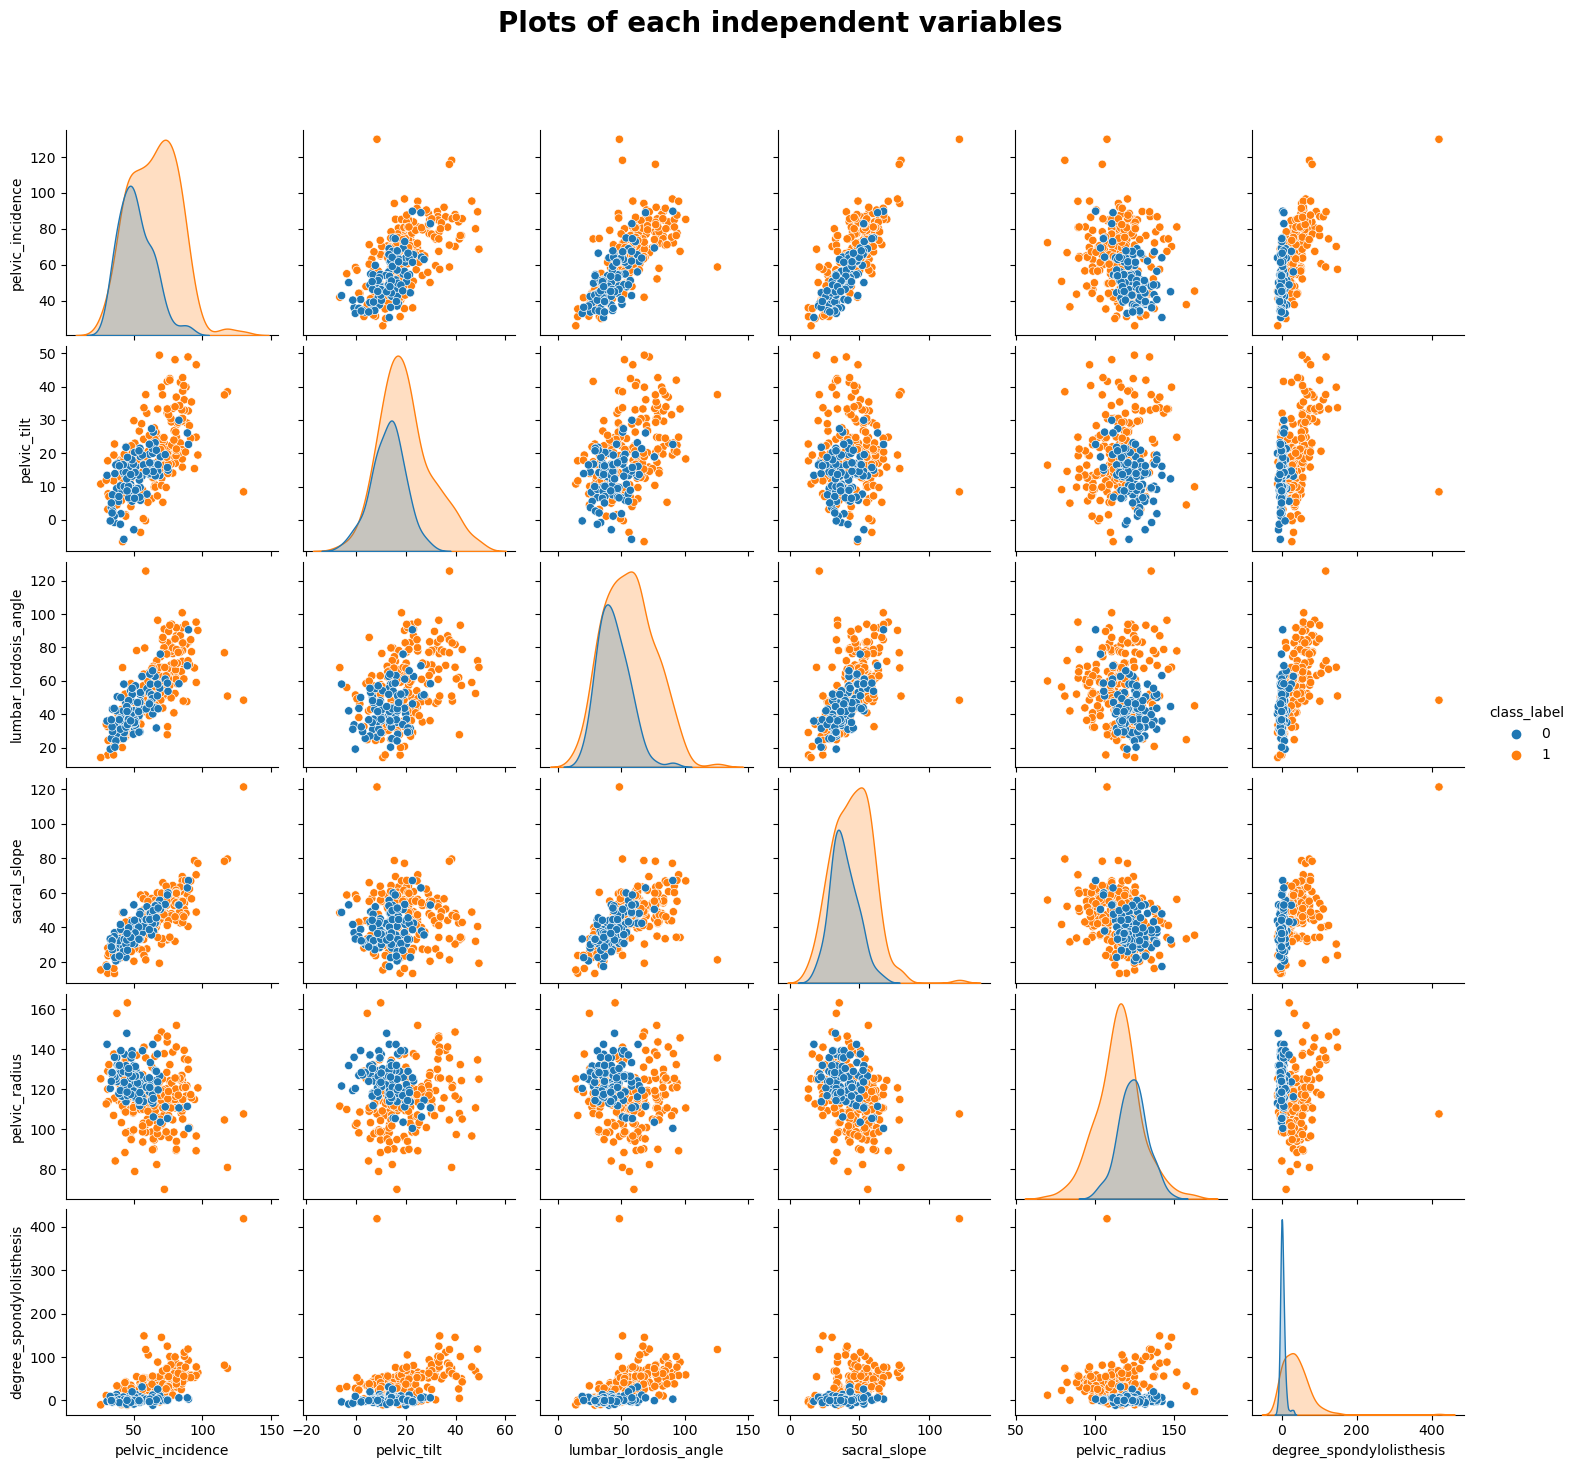

In [3]:
df['class_label'] = df['class'].apply(lambda x:1 if x == 'Abnormal' else 0) # apply 1 for abnormal, 0 for normal as class label
df = df.drop(columns=['class']) # we do not use this column

sns.pairplot(df, hue='class_label')
plt.subplots_adjust(top=0.9)
plt.suptitle('Plots of each independent variables', fontsize=20, weight='bold')

['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class_label']


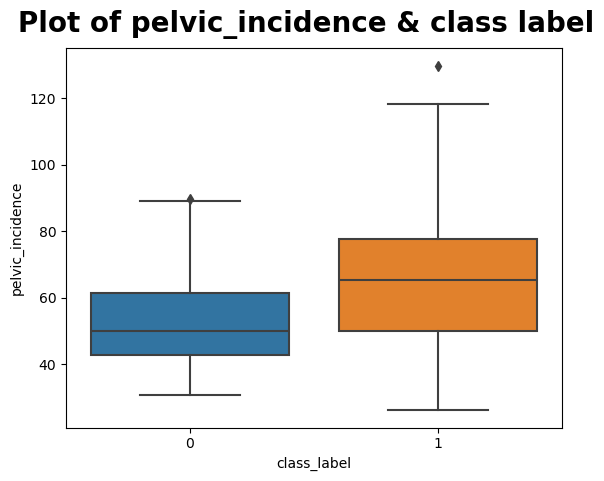

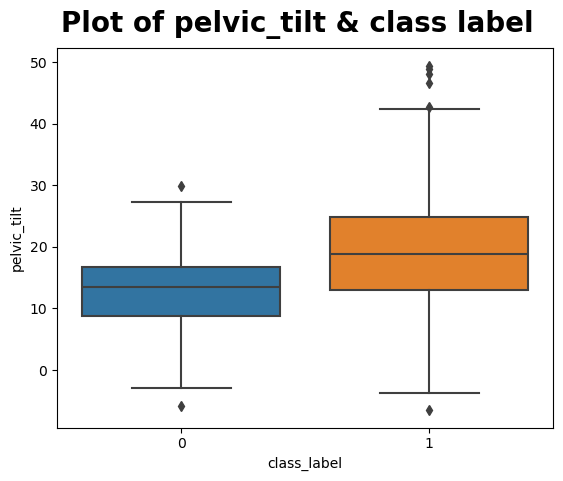

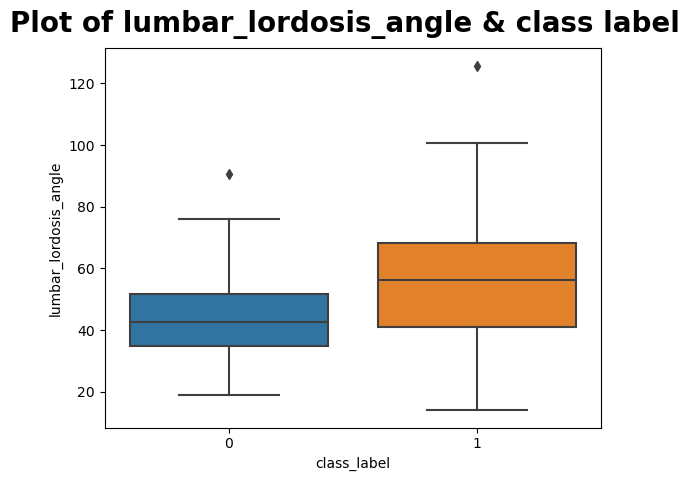

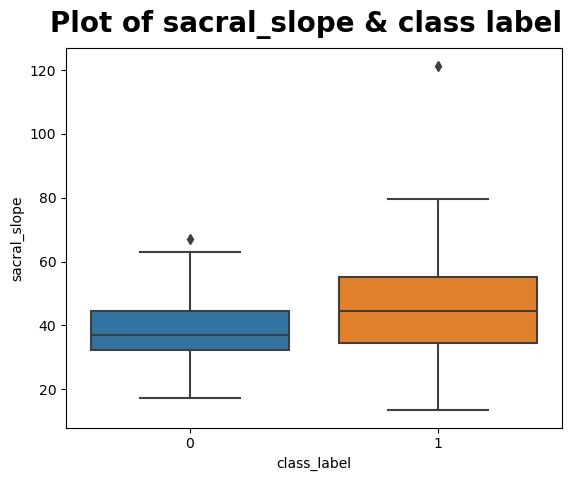

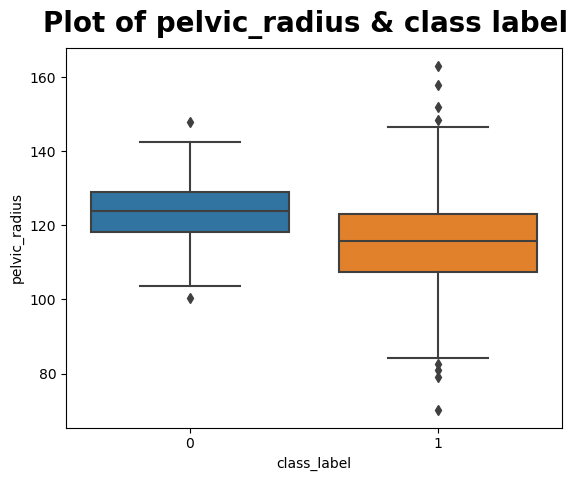

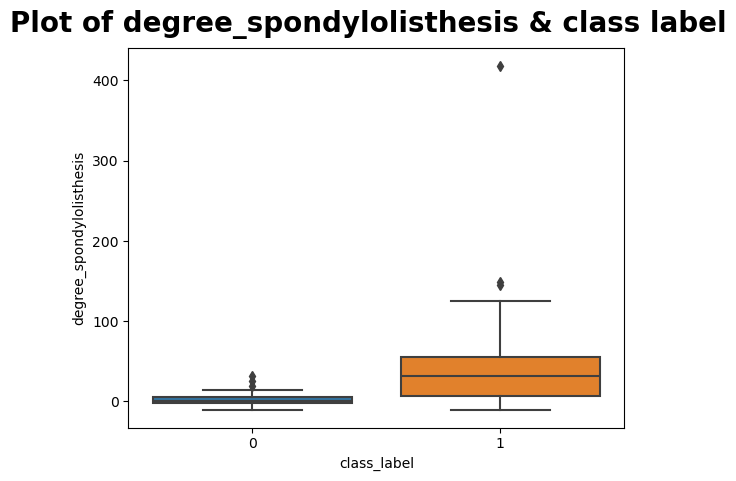

In [4]:
columns_list = list(df.columns) # extract columns
print(columns_list)

for column in columns_list[:-1]:
    # show each plot separately 
    sns.boxplot(x='class_label', y = column, data=df)
    plt.subplots_adjust(top=0.9)
    plt.suptitle(f'Plot of {column} & class label', fontsize=20, weight='bold')
    plt.show()

In [5]:
#df = df.sort_values(by='class_label', ascending=True) # sort class labels

# split data by class label
df_class0 = df[df['class_label'] == 0].reset_index(drop=True)
df_class1 = df[df['class_label'] == 1].reset_index(drop=True)

In [6]:
df_class1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [7]:
training_data_class0 = df_class0.head(70)
training_data_class1 = df_class1.head(140)
training_data = pd.concat([training_data_class0, training_data_class1], ignore_index=True)

training_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_label
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
205,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
206,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
207,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
208,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [8]:
testing_data_class0 = df_class0.tail(len(df_class0)-70).reset_index(drop=True)
testing_data_class1 = df_class1.tail(len(df_class1)-140).reset_index(drop=True)
testing_data = pd.concat([testing_data_class0, testing_data_class1], ignore_index=True)
testing_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_label
0,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
1,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
2,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
3,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
4,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
95,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
96,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
97,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
98,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [9]:
# split data and label
X_train = training_data.drop(columns=['class_label'])
y_train = training_data['class_label']

X_test = testing_data.drop(columns=['class_label'])
y_test = testing_data['class_label']

In [10]:
def data_processing(df, class0_train_amount=70, class1_train_amount=140):
    df_class0 = df[df['class_label'] == 0].reset_index(drop=True)
    df_class1 = df[df['class_label'] == 1].reset_index(drop=True)
    
    training_data_class0 = df_class0.head(class0_train_amount)
    training_data_class1 = df_class1.head(class1_train_amount)
    training_data = pd.concat([training_data_class0, training_data_class1], ignore_index=True)
    
    testing_data_class0 = df_class0.tail(len(df_class0)-class0_train_amount).reset_index(drop=True)
    testing_data_class1 = df_class1.tail(len(df_class1)-class1_train_amount).reset_index(drop=True)
    testing_data = pd.concat([testing_data_class0, testing_data_class1], ignore_index=True)
    
    # split data and label
    X_train = training_data.drop(columns=['class_label'])
    y_train = training_data['class_label']

    X_test = testing_data.drop(columns=['class_label'])
    y_test = testing_data['class_label']

    data_output = [X_train, y_train, X_test, y_test]
    return data_output


data = data_processing(df)
print(data)

[     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           38.505273    16.964297              35.112814     21.540976   
1           54.920858    18.968430              51.601455     35.952428   
2           44.362490     8.945435              46.902096     35.417055   
3           48.318931    17.452121              48.000000     30.866809   
4           45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
205         77.121344    30.349874              77.481083     46.771470   
206         88.024499    39.844669              81.774473     48.179830   
207         83.396606    34.310989              78.423293     49.085617   
208         72.054034    24.700737              79.874016     47.353297   
209         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis  
0       127.632875                  7.986683  
1   

### (c) Classification using KNN on Vertebral Column Data Set


- i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).
- ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈{208, 205, . . . , 7, 4, 1, }(in reverse order). You are welcome to use smaller increments of k. Which k∗is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.
- iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.4 Note: for each N , select your training set by choosing the first [N/3] rows of Class 0 and the first N −[N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N , select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [11]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # calculate distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # sort distances
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # magority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0]

**reference: 
https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html,
https://scikit-learn.org/stable/api/sklearn.metrics.html** 

In [12]:
# train by KNN in scikit-learn package
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
def knn_training(data, k=3, metric='euclidean', p=None, mah_param=None, weights=None):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weights)
    if metric == 'minkowski':
        # to get p in (d)
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p, weights=weights)
    if metric == 'mahalanobis':
        # to get params for mahalanobis
        knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params=mah_param, weights=weights)
    knn.fit(data[0], data[1])
    y_train_pred = knn.predict(data[0])
    y_test_pred = knn.predict(data[2])

    # check accuracy
    training_acc = accuracy_score(data[1], y_train_pred)
    testing_acc = accuracy_score(data[3], y_test_pred)
    print(f"k={k}: Training acc: {training_acc.round(2)}, Testing acc: {testing_acc}")
    training_err = (1-training_acc).round(2)
    testing_err = (1-testing_acc).round(2)

    return training_err, testing_err

In [14]:
training_err_list = []
testing_err_list = []

for k in range(208, 0, -3):
    training_err, testing_err = knn_training(data, k=k)
    training_err_list.append(training_err)
    testing_err_list.append(testing_err)

print(training_err_list)
print(testing_err_list)

k=208: Training acc: 0.67, Testing acc: 0.7
k=205: Training acc: 0.67, Testing acc: 0.7
k=202: Training acc: 0.67, Testing acc: 0.7
k=199: Training acc: 0.67, Testing acc: 0.7
k=196: Training acc: 0.67, Testing acc: 0.7
k=193: Training acc: 0.67, Testing acc: 0.7
k=190: Training acc: 0.67, Testing acc: 0.7
k=187: Training acc: 0.67, Testing acc: 0.7
k=184: Training acc: 0.67, Testing acc: 0.7
k=181: Training acc: 0.67, Testing acc: 0.7
k=178: Training acc: 0.67, Testing acc: 0.7
k=175: Training acc: 0.67, Testing acc: 0.7
k=172: Training acc: 0.67, Testing acc: 0.7
k=169: Training acc: 0.67, Testing acc: 0.7
k=166: Training acc: 0.67, Testing acc: 0.7
k=163: Training acc: 0.67, Testing acc: 0.7
k=160: Training acc: 0.67, Testing acc: 0.7
k=157: Training acc: 0.67, Testing acc: 0.7
k=154: Training acc: 0.67, Testing acc: 0.7
k=151: Training acc: 0.67, Testing acc: 0.7
k=148: Training acc: 0.67, Testing acc: 0.7
k=145: Training acc: 0.67, Testing acc: 0.7
k=142: Training acc: 0.67, Testi

**Old code**

In [15]:
# training_err_list = []
# testing_err_list = []

# for k in range(208, 0, -3):
#     knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
#     knn.fit(X_train, y_train)
#     y_train_pred = knn.predict(X_train)
#     y_test_pred = knn.predict(X_test)

#     # check accuracy
#     training_acc = accuracy_score(y_train, y_train_pred)
#     training_err_list.append((1-training_acc).round(2))
#     testing_acc = accuracy_score(y_test, y_test_pred)
#     testing_err_list.append((1-testing_acc).round(2))
#     print(f"k={k}: Training acc: {training_acc.round(2)}, Testing acc: {testing_acc}")

# print(training_err_list)
# print(testing_err_list)

**In this case, k=4 or around 4 might be the most suitable value because it has the lowest testing error.**

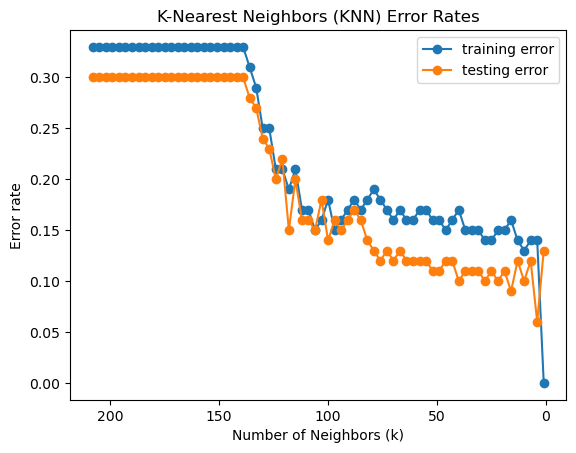

In [16]:
# plot training & testing error
k_list = [k for k in range(208, 0, -3)]
plt.plot(k_list, training_err_list, marker='o', label='training error')
plt.plot(k_list, testing_err_list, marker='o', label='testing error')
plt.gca().invert_xaxis()
plt.title('K-Nearest Neighbors (KNN) Error Rates')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.show()

Confusion_matrix: [[25  5]
 [ 1 69]]


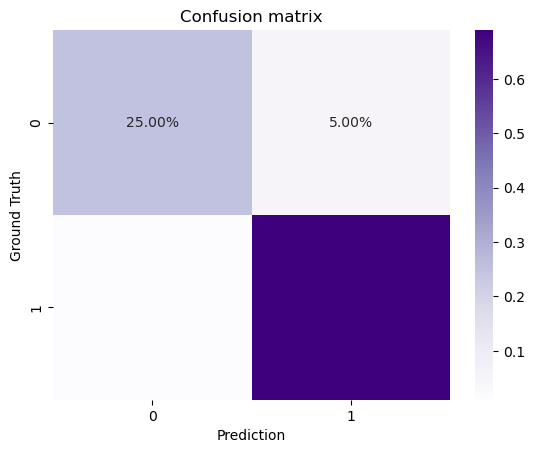

In [17]:
from sklearn.metrics import confusion_matrix

knn_star = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn_star.fit(X_train, y_train)
y_pred = knn_star.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print('Confusion_matrix:', confusion)

sns.heatmap((confusion/np.sum(confusion)), annot=True, cmap='Purples', fmt='.2%')
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show()

### In this case, I would set Normal(0) as positive and Abnormal(1) as negative

In [18]:
def evaluation(confusion):
    true_positive= confusion[0, 0]
    false_positive = confusion[0, 1]
    true_negative = confusion[1, 1]
    false_negative = confusion[1, 0]
    print(true_positive, false_positive, true_negative, false_negative)
    true_positive_rate = true_positive/(true_positive+false_negative)
    true_negative_rate = true_negative/(true_negative+false_positive)
    precision = true_positive/(true_positive+false_positive)
    f1 = 2*((precision*true_positive_rate)/(precision+true_positive_rate))

    print('True Positive Rate:', true_positive_rate)
    print('True Negative Rate:', true_negative_rate)
    print('Precision:', precision)
    print('F1: ', f1)

evaluation(confusion)

25 5 69 1
True Positive Rate: 0.9615384615384616
True Negative Rate: 0.9324324324324325
Precision: 0.8333333333333334
F1:  0.8928571428571429


### If we set Normal(0) as negative and Abnormal(1) as positive

In [19]:
def evaluation(confusion):
    true_positive= confusion[1, 1]
    false_positive = confusion[1, 0]
    true_negative = confusion[0, 0]
    false_negative = confusion[0, 1]
    print(true_positive, false_positive, true_negative, false_negative)
    true_positive_rate = true_positive/(true_positive+false_negative)
    true_negative_rate = true_negative/(true_negative+false_positive)
    precision = true_positive/(true_positive+false_positive)
    f1 = 2*((precision*true_positive_rate)/(precision+true_positive_rate))

    print('True Positive Rate:', true_positive_rate)
    print('True Negative Rate:', true_negative_rate)
    print('Precision:', precision)
    print('F1: ', f1)

evaluation(confusion)

69 1 25 5
True Positive Rate: 0.9324324324324325
True Negative Rate: 0.9615384615384616
Precision: 0.9857142857142858
F1:  0.9583333333333333


In [20]:
best_errors = []
for n in range(10, 211, 10):
    data = data_processing(df, class0_train_amount=n//3, class1_train_amount=(n-n//3))
    errors = []
    for k in range(1, n+1, 5):
        _, testing_error = knn_training(data, k=k)
        errors.append(testing_error)
    best_errors.append(min(errors))
print(best_errors)

k=1: Training acc: 1.0, Testing acc: 0.72
k=6: Training acc: 0.9, Testing acc: 0.64
k=1: Training acc: 1.0, Testing acc: 0.7413793103448276
k=6: Training acc: 0.85, Testing acc: 0.7655172413793103
k=11: Training acc: 0.7, Testing acc: 0.6896551724137931
k=16: Training acc: 0.7, Testing acc: 0.6758620689655173
k=1: Training acc: 1.0, Testing acc: 0.7607142857142857
k=6: Training acc: 0.87, Testing acc: 0.7571428571428571
k=11: Training acc: 0.83, Testing acc: 0.7714285714285715
k=16: Training acc: 0.77, Testing acc: 0.7357142857142858
k=21: Training acc: 0.67, Testing acc: 0.6785714285714286
k=26: Training acc: 0.67, Testing acc: 0.6785714285714286
k=1: Training acc: 1.0, Testing acc: 0.34444444444444444
k=6: Training acc: 0.78, Testing acc: 0.725925925925926
k=11: Training acc: 0.8, Testing acc: 0.7444444444444445
k=16: Training acc: 0.75, Testing acc: 0.7407407407407407
k=21: Training acc: 0.68, Testing acc: 0.6777777777777778
k=26: Training acc: 0.68, Testing acc: 0.6777777777777778


**Old code**

In [21]:
# best_errors = []
# for n in range(10, 211, 10):
#     training_data_class0 = df_class0.head(n//3).reset_index(drop=True)
#     training_data_class1 = df_class1.head(n-n//3).reset_index(drop=True)
#     training_data = pd.concat([training_data_class0, training_data_class1], ignore_index=True)

#     testing_data_class0 = df_class0.tail(len(df_class0)-n//3).reset_index(drop=True)
#     testing_data_class1 = df_class1.tail(len(df_class1)-(n-n//3)).reset_index(drop=True)
#     testing_data = pd.concat([testing_data_class0, testing_data_class1], ignore_index=True)

#     X_train = training_data.drop(columns=['class_label'])
#     y_train = training_data['class_label']

#     X_test = testing_data.drop(columns=['class_label'])
#     y_test = testing_data['class_label']

#     errors = []
#     for k in range(1, n+1, 5):
#         knn = KNeighborsClassifier(n_neighbors=k)
#         knn.fit(X_train, y_train)
#         y_pred = knn.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)
#         errors.append(1-accuracy)
#     # print(errors)
#     best_errors.append(min(errors))
# print(best_errors)

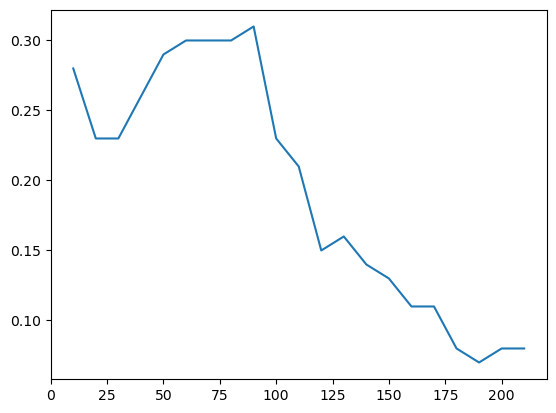

In [22]:
n_list = [n for n in range(10, 211, 10)]
plt.plot(n_list, best_errors)

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

- i. Minkowski Distance:
    - A. which becomes Manhattan Distance with p = 1.
    - B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
    - C. which becomes Chebyshev Distance with p →∞
- ii. Mahalanobis Distance.

## Minkiwski Distance
$$D(\mathbf{X}, \mathbf{Y}) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$$

In [23]:
data = data_processing(df)
testing_error_list = []
for k in range(1, 197, 5):
    _, testing_error = knn_training(data, k=k, metric='minkowski', p=1) # p = 1 => Manhatten Distance
    testing_error_list.append(testing_error)
print(testing_error_list)

k=1: Training acc: 1.0, Testing acc: 0.89
k=6: Training acc: 0.86, Testing acc: 0.89
k=11: Training acc: 0.86, Testing acc: 0.89
k=16: Training acc: 0.87, Testing acc: 0.88
k=21: Training acc: 0.85, Testing acc: 0.88
k=26: Training acc: 0.83, Testing acc: 0.89
k=31: Training acc: 0.83, Testing acc: 0.88
k=36: Training acc: 0.84, Testing acc: 0.87
k=41: Training acc: 0.83, Testing acc: 0.87
k=46: Training acc: 0.83, Testing acc: 0.87
k=51: Training acc: 0.83, Testing acc: 0.86
k=56: Training acc: 0.81, Testing acc: 0.87
k=61: Training acc: 0.82, Testing acc: 0.85
k=66: Training acc: 0.81, Testing acc: 0.85
k=71: Training acc: 0.82, Testing acc: 0.86
k=76: Training acc: 0.82, Testing acc: 0.86
k=81: Training acc: 0.83, Testing acc: 0.84
k=86: Training acc: 0.85, Testing acc: 0.85
k=91: Training acc: 0.82, Testing acc: 0.8
k=96: Training acc: 0.82, Testing acc: 0.8
k=101: Training acc: 0.8, Testing acc: 0.78
k=106: Training acc: 0.8, Testing acc: 0.79
k=111: Training acc: 0.78, Testing ac

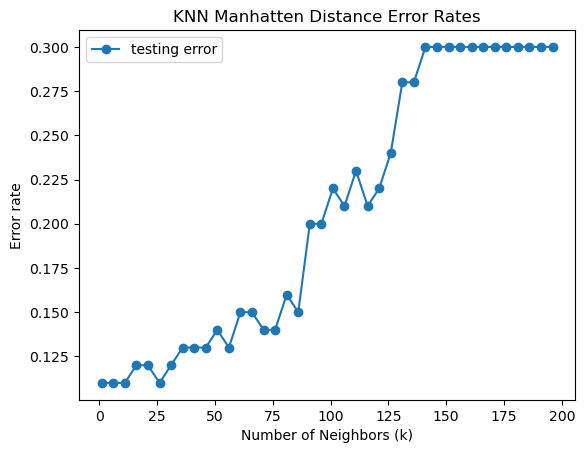

In [24]:
k_list = [k for k in range(1, 197, 5)]
plt.plot(k_list, testing_error_list, marker='o', label='testing error')
plt.title('KNN Manhatten Distance Error Rates')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.show()


**From the plot above, Manhattan Distance has the best performance when k is in [1, 6, 11, 26], which have testing error rate = 0.11**

In [25]:
log_p_nums = np.linspace(0.1, 1, 10)
p_nums = np.logspace(0.1, 1, 10)
print(log_p_nums)
print(p_nums)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 1.25892541  1.58489319  1.99526231  2.51188643  3.16227766  3.98107171
  5.01187234  6.30957344  7.94328235 10.        ]


### Since there are many k have the same lowest testing error, I would find the best p for each k

In [26]:
best_k = [1, 6, 11, 26]
best_logp_list = []
for k in best_k:
    error_list = []
    for p in p_nums:
        _, testing_error = knn_training(data, k=k, metric='minkowski', p=p)
        error_list.append(testing_error)
    print(f'Error list for k = {k}: {error_list}')
    print(f'Lowest error for k = {k}: {min(error_list)}\n')
    best_p_index = error_list.index(min(error_list))
    best_logp = log_p_nums[best_p_index].round(2)
    best_logp_list.append((best_logp,  min(error_list)))
print(best_logp_list)

k=1: Training acc: 1.0, Testing acc: 0.87
k=1: Training acc: 1.0, Testing acc: 0.87
k=1: Training acc: 1.0, Testing acc: 0.87
k=1: Training acc: 1.0, Testing acc: 0.86
k=1: Training acc: 1.0, Testing acc: 0.86
k=1: Training acc: 1.0, Testing acc: 0.88
k=1: Training acc: 1.0, Testing acc: 0.89
k=1: Training acc: 1.0, Testing acc: 0.89
k=1: Training acc: 1.0, Testing acc: 0.89
k=1: Training acc: 1.0, Testing acc: 0.89
Error list for k = 1: [0.13, 0.13, 0.13, 0.14, 0.14, 0.12, 0.11, 0.11, 0.11, 0.11]
Lowest error for k = 1: 0.11

k=6: Training acc: 0.86, Testing acc: 0.91
k=6: Training acc: 0.85, Testing acc: 0.91
k=6: Training acc: 0.85, Testing acc: 0.92
k=6: Training acc: 0.85, Testing acc: 0.92
k=6: Training acc: 0.85, Testing acc: 0.92
k=6: Training acc: 0.85, Testing acc: 0.94
k=6: Training acc: 0.85, Testing acc: 0.93
k=6: Training acc: 0.85, Testing acc: 0.92
k=6: Training acc: 0.85, Testing acc: 0.91
k=6: Training acc: 0.87, Testing acc: 0.91
Error list for k = 6: [0.09, 0.09, 0.

**According to the output above, when k=6, the best log p is 0.6 (p=3.98107171), which has the testing error = 0.06**

## Chebyshev Distance

In [27]:
error_list = []
for k in range(1, 197, 5):
    _, testing_error = knn_training(data, k=k, metric='chebyshev')
    error_list.append(testing_error)
print(error_list)
k_list = [k for k in range(1, 197, 5)]
print('Best k:', k_list[error_list.index(min(error_list))])

k=1: Training acc: 1.0, Testing acc: 0.87
k=6: Training acc: 0.85, Testing acc: 0.9
k=11: Training acc: 0.84, Testing acc: 0.88
k=16: Training acc: 0.85, Testing acc: 0.92
k=21: Training acc: 0.87, Testing acc: 0.89
k=26: Training acc: 0.84, Testing acc: 0.88
k=31: Training acc: 0.86, Testing acc: 0.88
k=36: Training acc: 0.84, Testing acc: 0.9
k=41: Training acc: 0.86, Testing acc: 0.87
k=46: Training acc: 0.84, Testing acc: 0.88
k=51: Training acc: 0.83, Testing acc: 0.88
k=56: Training acc: 0.83, Testing acc: 0.88
k=61: Training acc: 0.82, Testing acc: 0.86
k=66: Training acc: 0.84, Testing acc: 0.87
k=71: Training acc: 0.82, Testing acc: 0.86
k=76: Training acc: 0.82, Testing acc: 0.89
k=81: Training acc: 0.83, Testing acc: 0.86
k=86: Training acc: 0.83, Testing acc: 0.88
k=91: Training acc: 0.84, Testing acc: 0.85
k=96: Training acc: 0.84, Testing acc: 0.86
k=101: Training acc: 0.83, Testing acc: 0.81
k=106: Training acc: 0.83, Testing acc: 0.82
k=111: Training acc: 0.82, Testing 

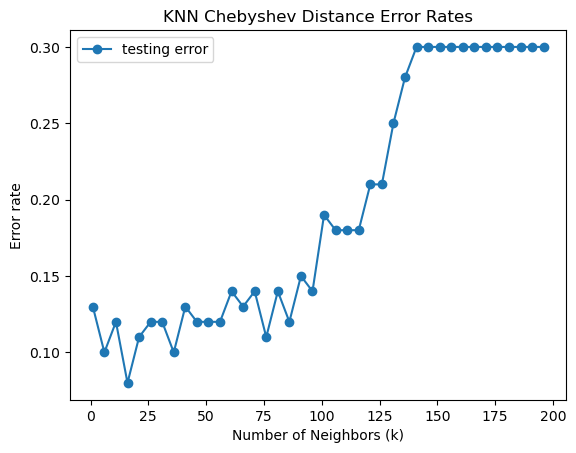

In [28]:
plt.plot(k_list, error_list, marker='o', label='testing error')
plt.title('KNN Chebyshev Distance Error Rates')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.show()

**The best k for Chebyshev Distance is k = 16**

## Mahalanobis Distance
	• Scale-Invariant: Removes the influence of different scales among features.
	• Correlation-Aware: Takes into account the covariance between features.
	• Centralized Measurement: Measures how far a point is from the mean of a distribution.
	
$$D_M(\mathbf{x}) = \sqrt{ (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) }$$
	•	 x is the vector representing the point.
	•	 mu  is the mean vector of the distribution.
	•	 Sigma  is the covariance matrix of the distribution.
	•	 Sigma^{-1}  is the inverse of the covariance matrix.

In [29]:
def inverse_covar_matrix_function(X):
    conv_matrix = np.cov(X, rowvar=False) # rowvar = False => columns are features, rows are samples
    inverse_covar_matrix = np.linalg.pinv(conv_matrix) # inv() can only handle square matrix
    return inverse_covar_matrix

inverse_covar_matrix = inverse_covar_matrix_function(X_train)
print(inverse_covar_matrix)

[[ 0.00530086  0.00281642 -0.00425868  0.00248444  0.00196136 -0.00135905]
 [ 0.00281642  0.00646935 -0.00115217 -0.00365293 -0.00040802 -0.00029105]
 [-0.00425868 -0.00115217  0.00804108 -0.00310651 -0.00181345  0.00036006]
 [ 0.00248444 -0.00365293 -0.00310651  0.00613737  0.00236938 -0.001068  ]
 [ 0.00196136 -0.00040802 -0.00181345  0.00236938  0.00878435 -0.00066191]
 [-0.00135905 -0.00029105  0.00036006 -0.001068   -0.00066191  0.00117557]]


In [30]:
k_list = [k for k in range(1, 197, 5)]
error_list = []
for k in k_list:
    _, testing_error = knn_training(data, k=k, metric='mahalanobis', mah_param={'VI': inverse_covar_matrix})
    error_list.append(testing_error)
print(error_list)

k=1: Training acc: 1.0, Testing acc: 0.85
k=6: Training acc: 0.86, Testing acc: 0.84
k=11: Training acc: 0.84, Testing acc: 0.82
k=16: Training acc: 0.85, Testing acc: 0.83
k=21: Training acc: 0.84, Testing acc: 0.8
k=26: Training acc: 0.84, Testing acc: 0.83
k=31: Training acc: 0.83, Testing acc: 0.79
k=36: Training acc: 0.83, Testing acc: 0.79
k=41: Training acc: 0.81, Testing acc: 0.81
k=46: Training acc: 0.81, Testing acc: 0.78
k=51: Training acc: 0.83, Testing acc: 0.79
k=56: Training acc: 0.83, Testing acc: 0.79
k=61: Training acc: 0.82, Testing acc: 0.77
k=66: Training acc: 0.82, Testing acc: 0.79
k=71: Training acc: 0.83, Testing acc: 0.78
k=76: Training acc: 0.83, Testing acc: 0.79
k=81: Training acc: 0.81, Testing acc: 0.76
k=86: Training acc: 0.8, Testing acc: 0.79
k=91: Training acc: 0.81, Testing acc: 0.76
k=96: Training acc: 0.8, Testing acc: 0.76
k=101: Training acc: 0.8, Testing acc: 0.76
k=106: Training acc: 0.77, Testing acc: 0.77
k=111: Training acc: 0.75, Testing ac

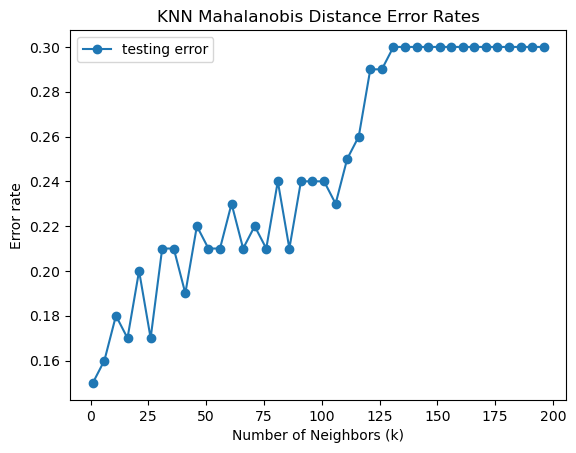

In [31]:
plt.plot(k_list, error_list, marker='o', label='testing error')
plt.title('KNN Mahalanobis Distance Error Rates')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.show()

**In this case, k=1 is the best k for Mahalanobis Distance, and it has the testing error = 0.15**

### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈{1, 6, 11, 16, . . . , 196}.


### Distance-based Weighting: Neighbors closer to the query point get more weight.

In [32]:
from collections import defaultdict
k_list = [k for k in range(1, 197, 5)]
testing_error_dic = defaultdict(list)
for k in k_list:
    _, euclidean_test_error = knn_training(data, k=k, metric='euclidean', weights='distance')
    _, manhatten_test_error = knn_training(data, k=k, metric='minkowski', weights='distance', p=1)
    _, chebyshev_test_error = knn_training(data, k=k, metric='chebyshev', weights='distance')
    testing_error_dic['euclidean_errors'].append(euclidean_test_error)
    testing_error_dic['manhatten_errors'].append(manhatten_test_error)
    testing_error_dic['chebyshev_errors'].append(chebyshev_test_error)
print('Euclidean Errors:', testing_error_dic['euclidean_errors'])
print('Manhatten Errors:', testing_error_dic['manhatten_errors'])
print('Chebyshev Errors:', testing_error_dic['chebyshev_errors'])

k=1: Training acc: 1.0, Testing acc: 0.87
k=1: Training acc: 1.0, Testing acc: 0.89
k=1: Training acc: 1.0, Testing acc: 0.87
k=6: Training acc: 1.0, Testing acc: 0.9
k=6: Training acc: 1.0, Testing acc: 0.89
k=6: Training acc: 1.0, Testing acc: 0.87
k=11: Training acc: 1.0, Testing acc: 0.88
k=11: Training acc: 1.0, Testing acc: 0.89
k=11: Training acc: 1.0, Testing acc: 0.88
k=16: Training acc: 1.0, Testing acc: 0.89
k=16: Training acc: 1.0, Testing acc: 0.88
k=16: Training acc: 1.0, Testing acc: 0.89
k=21: Training acc: 1.0, Testing acc: 0.89
k=21: Training acc: 1.0, Testing acc: 0.89
k=21: Training acc: 1.0, Testing acc: 0.88
k=26: Training acc: 1.0, Testing acc: 0.89
k=26: Training acc: 1.0, Testing acc: 0.9
k=26: Training acc: 1.0, Testing acc: 0.88
k=31: Training acc: 1.0, Testing acc: 0.89
k=31: Training acc: 1.0, Testing acc: 0.89
k=31: Training acc: 1.0, Testing acc: 0.89
k=36: Training acc: 1.0, Testing acc: 0.89
k=36: Training acc: 1.0, Testing acc: 0.89
k=36: Training acc:

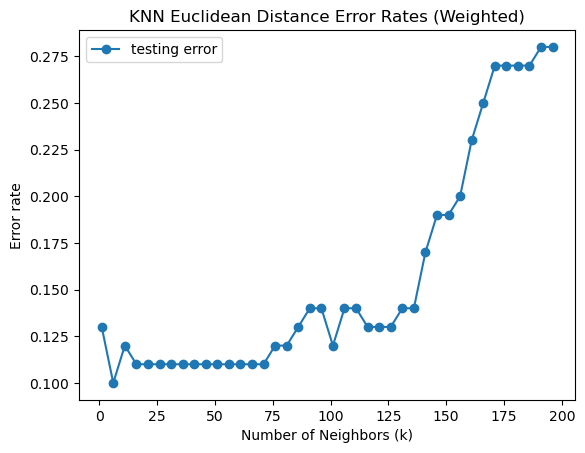

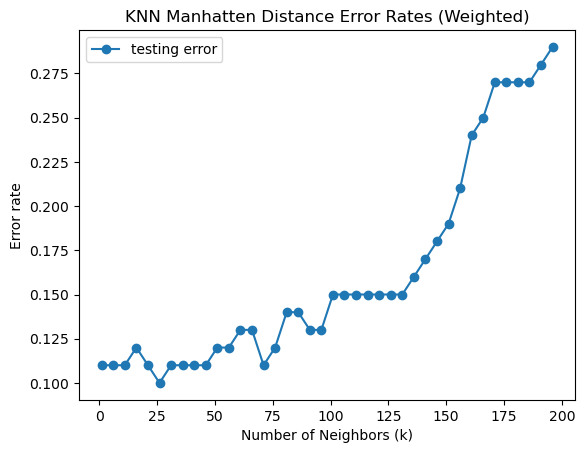

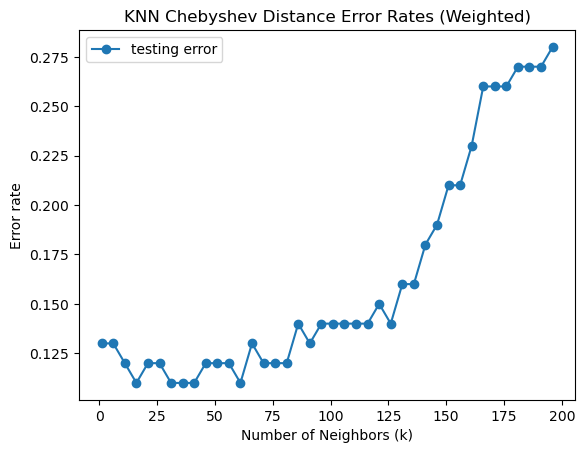

In [33]:
plt.plot(k_list, testing_error_dic['euclidean_errors'], marker='o', label='testing error')
plt.title('KNN Euclidean Distance Error Rates (Weighted)')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.show()

plt.plot(k_list, testing_error_dic['manhatten_errors'], marker='o', label='testing error')
plt.title('KNN Manhatten Distance Error Rates (Weighted)')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.show()

plt.plot(k_list, testing_error_dic['chebyshev_errors'], marker='o', label='testing error')
plt.title('KNN Chebyshev Distance Error Rates (Weighted)')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.show() 

**In weighted Euclidean distance, the best k = 6, which has testing error rate = 0.1**

**In weighted Manhatten distance, the best k = 26, which has testing error rate = 0.1**

**In weighted Euclidean distance, the best k = [16, 31, 36, 41, 61], which have testing error rate = 0.11**

### (f) What is the lowest training error rate you achieved in this homework?

**The lowest training error rate in this homework is 0 and most are in k = 1. This is because when k=1, the only neighbor for a dot is itself.**